In [1]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('/home/kino/work/00_HEA/python_module')
from hea4f3 import Hea4Feature3data

g_calctype="asa"
g_polytype="fcc"

g_hea4 = Hea4Feature3data(g_calctype)

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


In [2]:
sys.path.append('.')

from Common import load_save_pickle

In [3]:
status, g_df_calc_polytype_loaded = load_save_pickle("df_extend_{}_{}.pickle".format(g_calctype, g_polytype),
                                                None, action=None)
print(status)
if status == "loaded":
    g_df_calc_polytype = g_df_calc_polytype_loaded

loaded


In [4]:
g_df_calc_polytype.shape
# check whether the size is the same or not

(73494, 120)

In [5]:
for name in g_df_calc_polytype.columns:
    print("'{}', ".format(name),end="")

'heakey', 'element1', 'element2', 'element3', 'element4', 'polytyp', 'ewidth', 'edelt', 'conv', 'lattice constant', 'volume', 'moment1', 'moment2', 'moment3', 'moment4', 'total moment', 'TC(K)', 'resistivity(micro ohm cm)', 'TE(Ry)', 'material name', 'total magnetic moment per volume', 'group_mean', 'row_mean', 'group1_mean', 'group2_mean', 'group3_mean', 'group4_mean', 'group5_mean', 'group6_mean', 'group7_mean', 'group8_mean', 'group9_mean', 'group10_mean', 'group11_mean', 'group12_mean', 'group13_mean', 'group14_mean', 'group15_mean', 'group16_mean', 'group17_mean', 'group18_mean', 'row1_mean', 'row2_mean', 'row3_mean', 'row4_mean', 'row5_mean', 'row6_mean', 'row7_mean', 'row8_mean', 'row9_mean', 's1_mean', 's2_mean', 'p1_mean', 'p2_mean', 'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean', 'd2_mean', 'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean', 'd8_mean', 'd9_mean', 'd10_mean', 'f1_mean', 'f2_mean', 'f3_mean', 'f4_mean', 'f5_mean', 'f6_mean', 'f7_mean', 'f8_mean', 'f9_

In [6]:
g_df_calc_polytype

heakey  element1  element2  element3  element4 polytyp  ewidth  \
0      13142122        13        14        21        22     fcc   1.200   
1      13142123        13        14        21        23     fcc   1.200   
2      13142124        13        14        21        24     fcc   1.200   
3      13142125        13        14        21        25     fcc   1.200   
4      13142126        13        14        21        26     fcc   1.200   
...         ...       ...       ...       ...       ...     ...     ...   
73489  73778182        73        77        81        82     fcc   0.700   
73490  73788182        73        78        81        82     fcc   0.700   
73491  73798182        73        79        81        82     fcc   0.700   
73492  73808182        73        80        81        82     fcc   1.002   
73493  73818283        73        81        82        83     fcc   1.000   

        edelt  conv  lattice constant  ...  group_max  row_max  X_max  \
0      0.0001  True           8.11957  ...       14.0      4.0   1.90   
1      0.0001  True           7.98857  ...       14.0      4.0   1.90   
2      0.0001  True           7.92164  ...       14.0      4.0   1.90   
3      0.0001  True           7.92913  ...       14.0      4.0   1.90   
4      0.0001  True           7.91348  ...       14.0      4.0   1.90   
...       ...   ...               ...  ...        ...      ...    ...   
73489  0.0001  True           8.50051  ...       14.0      6.0   2.33   
73490  0.0001  True           8.52988  ...       14.0      6.0   2.33   
73491  0.0001  True           8.58730  ...       14.0      6.0   2.54   
73492  0.0001  True           8.77901  ...       14.0      6.0   2.33   
73493  0.0001  True           9.11674  ...       15.0      6.0   2.33   

       atomic_radius_max  atomic_radius_calculated_max  \
0                    1.6                          1.84   
1                    1.6                          1.84   
2                    1.6                          1.84   
3                    1.6                          1.84   
4                    1.6                          1.84   
...                  ...                           ...   
73489                1.9                          2.00   
73490                1.9                          2.00   
73491                1.9                          2.00   
73492                1.9                          2.00   
73493                1.9                          2.00   

       thermal_conductivity_max  boiling_point_max  melting_point_max  \
0                         235.0             3560.0             1941.0   
1                         235.0             3680.0             2183.0   
2                         235.0             3173.0             2180.0   
3                         235.0             3173.0             1814.0   
4                         235.0             3173.0             1814.0   
...                         ...                ...                ...   
73489                     150.0             5731.0             3290.0   
73490                      72.0             5731.0             3290.0   
73491                     320.0             5731.0             3290.0   
73492                      57.0             5731.0             3290.0   
73493                      57.0             5731.0             3290.0   

       molar_volume_max log_electrical_resistivity_max  
0                 15.00                      -6.907755  
1                 15.00                      -6.907755  
2                 15.00                      -6.907755  
3                 15.00                      -6.907755  
4                 15.00                      -6.907755  
...                 ...                            ...  
73489             18.26                     -15.376158  
73490             18.26                     -15.376158  
73491             18.26                     -15.376158  
73492             18.26                     -13.856333  
73493             21.31       

# select only non-magnetic cases

and make an abbreviation for regression



In [7]:
g_df_feature_target = g_df_calc_polytype.query(g_hea4.querystr_by_local_moment(add_not=True))
g_df_feature_target.reset_index(drop=True, inplace=True)

not (abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01)


# define descriptor features by hand

In [8]:
from Common import make_features

# g_features = make_features(["basic_mean_std", "basic_min_max",
#                            "phys_prop_mean_std", "phys_prop_min_max"])

# the best
g_features = make_features(["phys_prop_mean_std", "basic_mean_std"])

# g_features = make_features(["phys_prop_mean_std", "basic_min_max"])

# g_features = make_features(["phys_prop_min_max", "basic_mean_std"])


features
22
['group_mean', 'group_std', 'row_mean', 'group_std', 'X_mean', 'atomic_radius_mean', 'atomic_radius_calculated_mean', 'thermal_conductivity_mean', 'boiling_point_mean', 'melting_point_mean', 'molar_volume_mean', 'log_electrical_resistivity_mean', 'group_std', 'row_std', 'X_std', 'atomic_radius_std', 'atomic_radius_calculated_std', 'thermal_conductivity_std', 'boiling_point_std', 'melting_point_std', 'molar_volume_std', 'log_electrical_resistivity_std']



In [9]:
g_target_list = ['total magnetic moment per volume',
            'TC(K)', 'resistivity(micro ohm cm)']

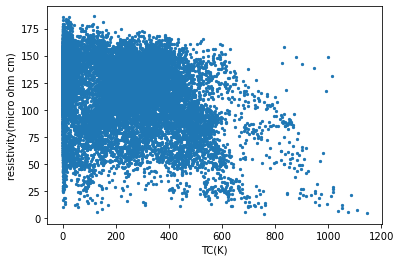

In [13]:
g_df_feature_target.plot(x=g_target_list[1], y=g_target_list[2], kind="scatter", marker=".")

In [10]:
import random
random.seed(1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
import numpy as np

In [12]:
from Common import do_linear_regression, do_linear_regresson_X2,\
                   do_randomforest_regression, do_kneighbors_regression,\
                   do_bayselinear_regresson_X2

In [13]:
import Common
print(Common.__version__)

0.2.0


total magnetic moment per volume
(20832, 44)
0 R2 0.28914036517181607
1 R2 0.26050911696054957
2 R2 0.33116481568902323
3 R2 0.31324327044727684
4 R2 0.3249810049063122
5 R2 0.32876793607622257
6 R2 0.339551070798945
7 R2 0.2983815416116631
8 R2 0.2738259144584514
9 R2 0.2961225740391207
number of test data (20832,)
plot_type ['plt_simple']


/home/kino/work/00_HEA/hea4_regression/Common.py:356: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/Bayesian_linear_regression,_X1_X2,_train_test_split,total_magnetic_moment_per_volume.png
TC(K)
(20832, 44)
0 R2 0.7394072540772775
1 R2 0.7378544457734986
2 R2 0.7249200675697758
3 R2 0.7208923333897589
4 R2 0.7341235718010568
5 R2 0.7359378954903101
6 R2 0.7297855686216591
7 R2 0.764333250211518
8 R2 0.7353080319611935
9 R2 0.7406884576891473
number of test data (20832,)
plot_type ['plt_simple']
image saved:  images/Bayesian_linear_regression,_X1_X2,_train_test_split,TC(K).png
resistivity(micro ohm cm)
(20832, 44)


/home/kino/work/00_HEA/hea4_regression/Common.py:356: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0 R2 0.7944075789911957
1 R2 0.7908376321280453
2 R2 0.7919641139267191
3 R2 0.7799052927033611
4 R2 0.7932129099855941
5 R2 0.7868147812418829
6 R2 0.7857449991380281
7 R2 0.7806297697582565
8 R2 0.8071027651282153
9 R2 0.7817196072629926
number of test data (20832,)
plot_type ['plt_simple']
image saved:  images/Bayesian_linear_regression,_X1_X2,_train_test_split,resistivity(micro_ohm_cm).png


/home/kino/work/00_HEA/hea4_regression/Common.py:356: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


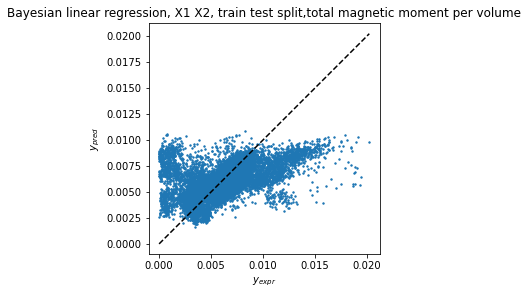

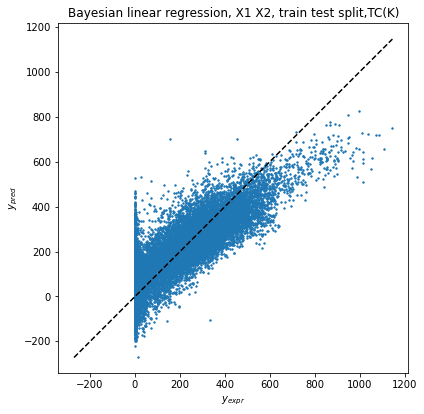

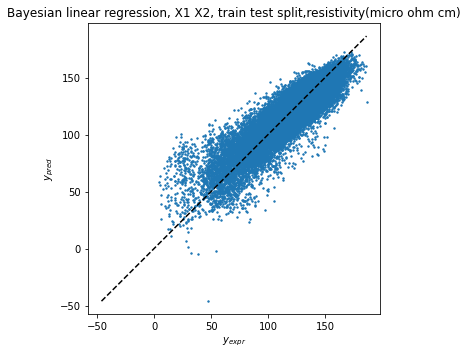

In [14]:
%matplotlib inline

def all_regression(df_feature_target, features, target_list):
    """execute all the regression and make resulting dict

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_list (str): a name of target variable

    Returns:
        dict: R2 results for all the regressions.
    """    
    result_dic_all = {}
    for target_name in  target_list:
        result_dic_all[target_name] = {}

    for target_name in  target_list:
        print(target_name)
        if False:
            result = do_linear_regression(df_feature_target, features, target_name)
            result_dic_all[target_name].update(result)
            result = do_linear_regresson_X2(df_feature_target, features, target_name)
            result_dic_all[target_name].update(result)
        if True:
            result = do_bayselinear_regresson_X2(df_feature_target, features, target_name)
            result_dic_all[target_name].update(result)
        if False:
            result = do_randomforest_regression(df_feature_target, features, target_name)
            result_dic_all[target_name].update(result)
        if False:
            result = do_kneighbors_regression(df_feature_target, features, target_name)
            result_dic_all[target_name].update(result)
    return result_dic_all

g_result_dic_all = all_regression(g_df_feature_target, g_features, g_target_list)

## loop done

## plot result


In [15]:
import pandas as pd

In [16]:
def result_to_df(result_dic_all):
    score_list = []
    for target in result_dic_all.keys():
        reg_method_dic = result_dic_all[target]
        for reg_method in reg_method_dic:
            # print(reg_method_dic[reg_method])
            score_dic = reg_method_dic[reg_method]
            for score in score_dic:
                score_list.append([target,reg_method,score,score_dic[score]])
    _df = pd.DataFrame(score_list,
                       columns=['target','reg_method','score_metric','score'])
    #_df.set_index(keys=['reg_method','target','score_metric'], inplace=True)
    return _df
def make_df_for_plot(df_score, target_list, score_metric="r2"):
    target_list = np.unique(df_score["target"].values)
    df_1 = df_score.query("score_metric=='{}'".format(score_metric))
    del df_1["score_metric"]

    df_2 = df_1.set_index(["target","reg_method"])
    df_3_list = []
    for target in target_list:
        df_3 = df_2.loc[target,:]
        df_3.columns=[target]
        df_3_list.append(df_3)
    df_4 = pd.concat(df_3_list, axis=1)
    return df_4

g_df_score_raw = result_to_df(g_result_dic_all)

score_metric = "r2"
g_df_r2 = make_df_for_plot(g_df_score_raw, g_target_list, score_metric=score_metric)

In [17]:
g_df_r2

TC(K)  \
reg_method                                                     
Bayesian linear regression, X1 X2, train test s...  0.736325   

                                                    resistivity(micro ohm cm)  \
reg_method                                                                      
Bayesian linear regression, X1 X2, train test s...                   0.789234   

                                                    total magnetic moment per volume  
reg_method                                                                            
Bayesian linear regression, X1 X2, train test s...                          0.305569

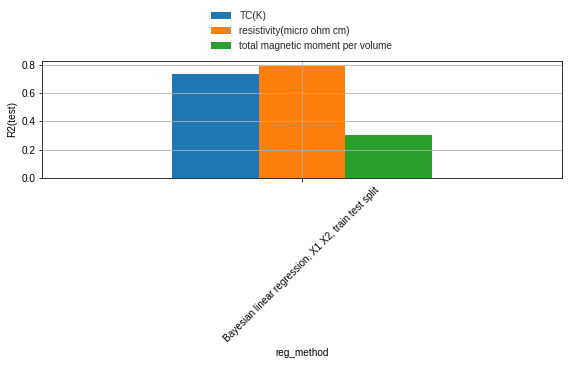

In [18]:
import matplotlib.pyplot as plt
from IPython.display import Image, display_png

def plot_r2(df_r2):
    """plot R2 results

    Args:
        df_r2 (DataFrame): containingg R2
    """    
    fig, ax = plt.subplots(1,1, figsize=(8,7))
    # plt.style.use('seaborn-colorblind')
    plt.style.use('seaborn-whitegrid')
    # plt.style.use('seaborn-darkgrid')

    df_r2.plot.bar(ax=ax)

    ax.legend(loc='upper center' , bbox_to_anchor=(0.5, 1.5))
    ax.set_ylabel("R2(test)")
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    pngfile = "target_r2.png"
    plt.savefig(pngfile)
    plt.show()

    # reload image to confirm whether tight_layout works well.
    # display_png(Image(pngfile))
    
plot_r2(g_df_r2)